<h1 style="color: #9B243A;">Recycling Classification with Computer Vision</h1>

<h3 style="color: #b35a;">-- Importing important libraries --</h3>

In [3]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [5]:
from PIL import Image
from collections import Counter

In [7]:
import utils
import eda_utils

In [9]:
os.getcwd()

'C:\\Users\\anacs\\Documents\\ironhack\\Week6\\Mini-project\\project-4-cv'

In [11]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'app.py',
 'best_mobilenet_model.keras',
 'CVRecycling.ipynb',
 'eda_utils.py',
 'MyTemplate.ipynb',
 'README.md',
 'recycling',
 'test-20250116T082206Z-001',
 'train-20250116T082203Z-001',
 'utils.py',
 'val-20250116T082158Z-001',
 '__pycache__']

<h1 style="color: #e8891d;">Data Extraction</h1>

In [14]:
DATA_PATH = r"C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling"

In [16]:
DATASET_PATH = os.path.join(DATA_PATH, "images", "images")

In [18]:
print("Dataset path:", DATASET_PATH)
print("Contents of dataset_path:", os.listdir(DATASET_PATH))

Dataset path: C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling\images\images
Contents of dataset_path: ['aerosol_cans', 'aluminum_food_cans', 'aluminum_soda_cans', 'cardboard_boxes', 'cardboard_packaging', 'clothing', 'coffee_grounds', 'disposable_plastic_cutlery', 'eggshells', 'food_waste', 'glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'paper_cups', 'plastic_cup_lids', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_shopping_bags', 'plastic_soda_bottles', 'plastic_straws', 'plastic_trash_bags', 'plastic_water_bottles', 'shoes', 'steel_food_cans', 'styrofoam_cups', 'styrofoam_food_containers', 'tea_bags']


In [20]:
RECYCLABLE_FOLDER = os.path.join(DATA_PATH, 'recyclable')
HOUSEHOLDWASTE_FOLDER = os.path.join(DATA_PATH, 'householdwaste')

<h3 style="color: #b35a;">-- Defining our categories --</h3>

In [22]:
# Category classification
RECYCLABLE_CATEGORIES = [
    "aerosol_cans",
    "aluminum_food_cans",
    "aluminum_soda_cans",
    "cardboard_boxes",
    "cardboard_packaging",
    "glass_beverage_bottles",
    "glass_cosmetic_containers",
    "glass_food_jars",
    "magazines",
    "newspaper",
    "office_paper",
    "plastic_detergent_bottles",
    "plastic_food_containers",
    "plastic_soda_bottles",
    "plastic_water_bottles",
    "steel_food_cans"
]

HOUSEHOLDWASTE_CATEGORIES = [
    "clothing",
    "coffee_grounds",
    "disposable_plastic_cutlery",
    "eggshells",
    "food_waste",
    "paper_cups",
    "plastic_cup_lids",
    "plastic_shopping_bags",
    "plastic_straws",
    "plastic_trash_bags",
    "shoes",
    "styrofoam_cups",
    "styrofoam_food_containers",
    "tea_bags"
]

<h3 style="color: #b35a;">-- Organizing the folders --</h3>

In [26]:
utils.organize_images(RECYCLABLE_FOLDER, HOUSEHOLDWASTE_FOLDER, DATASET_PATH, RECYCLABLE_CATEGORIES, HOUSEHOLDWASTE_CATEGORIES)

Copying images from 'real_world' in aerosol_cans -> C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling\recyclable
Copying images from 'default' in aerosol_cans -> C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling\recyclable
Copying images from 'real_world' in aluminum_food_cans -> C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling\recyclable
Copying images from 'default' in aluminum_food_cans -> C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling\recyclable
Copying images from 'real_world' in aluminum_soda_cans -> C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling\recyclable
Copying images from 'default' in aluminum_soda_cans -> C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling\recyclable
Copying images from 'real_world' in cardboard_boxes -> C:\Users\anacs\Documents\ironhack\Week6\Mini-project\project-4-cv\recycling\recyclable
Copying i

In [32]:
RECYCLABLE_FOLDER = os.path.join(DATA_PATH, 'recyclable')
HOUSEHOLDWASTE_FOLDER = os.path.join(DATA_PATH, 'householdwaste')
TRAIN_FOLDER = os.path.join(DATA_PATH, 'train')
VAL_FOLDER = os.path.join(DATA_PATH, 'val')
TEST_FOLDER = os.path.join(DATA_PATH, 'test')

<h3 style="color: #b35a;">-- Exploring the data (first impressions) --</h3>

In [34]:
eda_utils.split_dataset(DATA_PATH, TRAIN_FOLDER, VAL_FOLDER, TEST_FOLDER)

Found 7000 images in category: householdwaste
Found 0 images in category: images
No images found in images. Skipping...
Found 8000 images in category: recyclable


In [36]:
train_counts, train_sizes = eda_utils.analyze_folder(TRAIN_FOLDER)
print("Train data counts:", train_counts)

Train data counts: Counter({'C:\\Users\\anacs\\Documents\\ironhack\\Week6\\Mini-project\\project-4-cv\\recycling\\train\\recyclable': 5600, 'C:\\Users\\anacs\\Documents\\ironhack\\Week6\\Mini-project\\project-4-cv\\recycling\\train\\householdwaste': 4900})


In [38]:
val_counts, val_sizes = eda_utils.analyze_folder(VAL_FOLDER)
print("Validation data counts:", val_counts)

Validation data counts: Counter({'C:\\Users\\anacs\\Documents\\ironhack\\Week6\\Mini-project\\project-4-cv\\recycling\\val\\recyclable': 1200, 'C:\\Users\\anacs\\Documents\\ironhack\\Week6\\Mini-project\\project-4-cv\\recycling\\val\\householdwaste': 1050})


In [40]:
test_counts, test_sizes = eda_utils.analyze_folder(TEST_FOLDER)
print("Test data counts:", test_counts)

Test data counts: Counter({'C:\\Users\\anacs\\Documents\\ironhack\\Week6\\Mini-project\\project-4-cv\\recycling\\test\\recyclable': 1200, 'C:\\Users\\anacs\\Documents\\ironhack\\Week6\\Mini-project\\project-4-cv\\recycling\\test\\householdwaste': 1050})


In [42]:
print("Unique image sizes in test_sizes:", set(test_sizes))

Unique image sizes in test_sizes: {(256, 256)}


In [44]:
print("Unique image sizes in val_sizes:", set(val_sizes))

Unique image sizes in val_sizes: {(256, 256)}


In [46]:
print("Unique image sizes in train_sizes:", set(train_sizes))

Unique image sizes in train_sizes: {(256, 256)}


In [48]:
if len(set(train_sizes)) == 1:
    print(f"All images in the train set have the same size: {train_sizes[0]}")
else:
    eda_utils.plot_image_size_distribution(train_sizes)

All images in the train set have the same size: (256, 256)


In [50]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_FOLDER,
    image_size=(256, 256),
    batch_size=32
)

Found 10500 files belonging to 2 classes.


In [52]:
class_names = train_dataset.class_names  # ['recyclable', 'householdwaste']

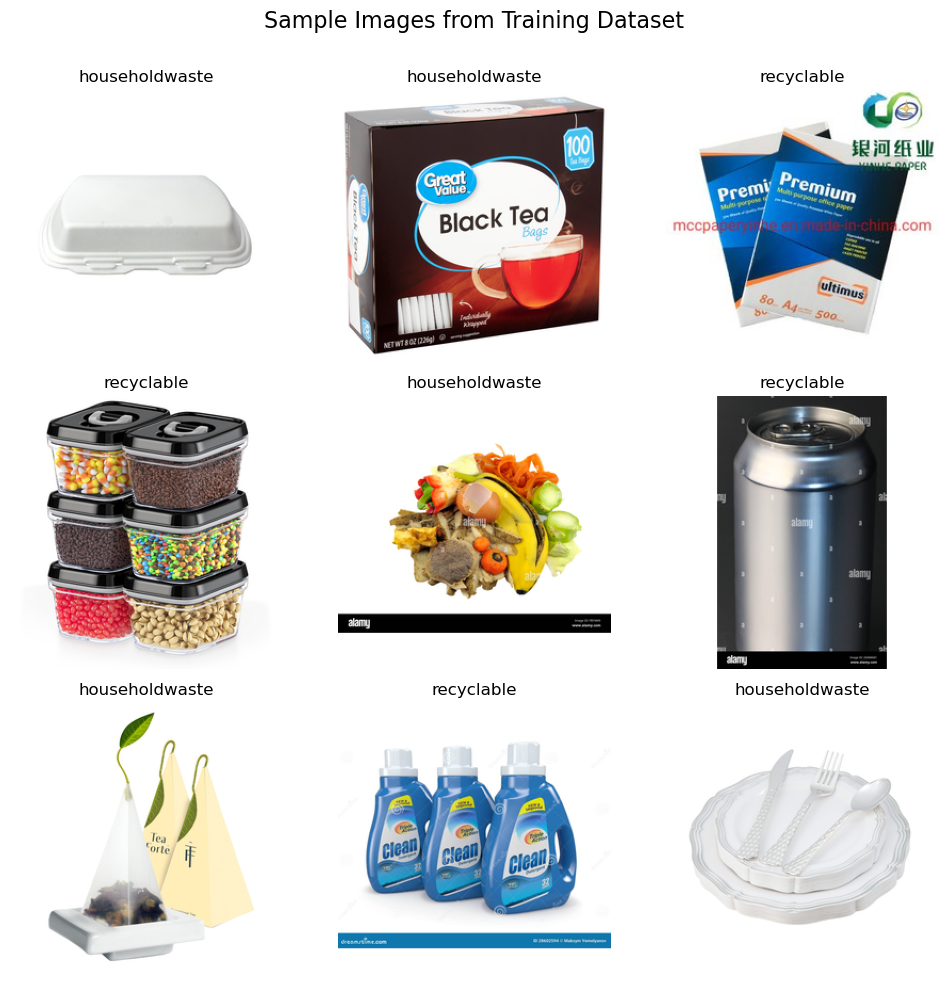

In [54]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):  # Take the first batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.suptitle("Sample Images from Training Dataset", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

<h1 style="color: #e8891d;"> Moving to Colab </h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_path = '/content/drive/My Drive/Colab Notebooks/RecyclingCV/recycling'

In [ ]:
TRAIN_FOLDER = os.path.join(data_path, 'train')
VAL_FOLDER = os.path.join(data_path, 'val')
TEST_FOLDER = os.path.join(data_path, 'test')

<h1 style="color: #e8891d;">Data Preprocessing</h1>

<h3 style="color: #b35a;">Train-Test split</h3>

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_data(train_dir, val_dir, test_dir, img_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(rescale=1.0/255)
    train_data = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=batch_size, image_size=img_size)
    val_data = tf.keras.utils.image_dataset_from_directory(val_dir, shuffle=True, batch_size=batch_size, image_size=img_size)
    test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=False, batch_size=batch_size, image_size=img_size)
    return train_data, val_data, test_data

In [96]:
train_data, val_data, test_data = preprocess_data(TRAIN_FOLDER, VAL_FOLDER, TEST_FOLDER)

Found 10500 files belonging to 2 classes.
Found 2250 files belonging to 2 classes.
Found 2250 files belonging to 2 classes.


In [98]:
def analyze_class_distribution(folder):
    class_counts = {}
    for category in os.listdir(folder):
        category_path = os.path.join(folder, category)
        if os.path.isdir(category_path):
            class_counts[category] = len(os.listdir(category_path))
    return class_counts

train_distribution = analyze_class_distribution(TRAIN_FOLDER)
val_distribution = analyze_class_distribution(VAL_FOLDER)
test_distribution = analyze_class_distribution(TEST_FOLDER)

print("Training Distribution:", train_distribution)
print("Validation Distribution:", val_distribution)
print("Test Distribution:", test_distribution)

Training Distribution: {'householdwaste': 4900, 'recyclable': 5600}
Validation Distribution: {'householdwaste': 1050, 'recyclable': 1200}
Test Distribution: {'householdwaste': 1050, 'recyclable': 1200}


<h3 style="color: #b35a;">-- Prefetching for optimization --</h3>

In [101]:
autotune = tf.data.AUTOTUNE

In [103]:
# Optimize dataset performance with prefetching
train_data = train_data.prefetch(buffer_size=autotune)
val_data = val_data.prefetch(buffer_size=autotune)
test_data = test_data.prefetch(buffer_size=autotune)

<h1 style="color: #e8891d;">Data Modeling</h1>

<h3 style="color: #b35a;">-- Baseline model --</h3>

In [112]:
from tensorflow.keras import layers, models, Input

def build_baseline_model(input_shape=(224, 224, 3)):
    model = models.Sequential([
        Input(shape=input_shape),  # Define the input shape explicitly
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [110]:
model = build_baseline_model()
# Train baseline model
baseline_history = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10


C:\Programas\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 98s 296ms/step - accuracy: 0.5631 - loss: 242.0006 - val_accuracy: 0.6542 - val_loss: 0.6444
Epoch 2/10
281/329 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.7012 - loss: 0.5620 

KeyboardInterrupt: 

<h3 style="color: #b35a;">-- Model Evaluation --</h3>

In [ ]:
# Evaluate baseline model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Baseline Test Loss: {test_loss}, Baseline Test Accuracy: {test_accuracy}")

<h1 style="color: #e8891d;">Improving the Model with Transfer Learning - MobileNetV2</h1>

In [ ]:
from tensorflow.keras.applications import MobileNetV2

def build_mobilenet_model(input_shape=(224, 224, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model
    x = layers.GlobalAveragePooling2D()(base_model.output)  # Use GAP for dimensionality reduction
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/best_mobilenet_model.keras',  # Filepath to save the model
    monitor='val_loss',             # Metric to monitor
    save_best_only=True,                # Save only the best model
    mode='min',                         # Save when the monitored metric is at its maximum
    verbose=1                           # Print a message when saving
)

In [ ]:
mobilenet_model = build_mobilenet_model()

In [ ]:
# Train the model and save the best version
mobilenet_model_history = mobilenet_model.fit(
    augmented_train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[checkpoint_callback]  # Include the callback
)

<h3 style="color: #b35a;">-- Visualizing Training and Validation Performance --</h3>

In [ ]:
# Extract metrics from the history object
accuracy = mobilenet_model_history.history['accuracy']
val_accuracy = mobilenet_model_history.history['val_accuracy']
loss = mobilenet_model_history.history['loss']
val_loss = mobilenet_model_history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<h3 style="color: #b35a;">-- Displaying Predictions --</h3>

In [ ]:
# Get predictions
predictions = mobilenet_model.predict(test_data)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

In [ ]:
# Extract ground truth labels from the test dataset
true_labels = np.concatenate([y for x, y in test_data], axis=0)

# Compare predictions with ground truth
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Display sample predictions
import matplotlib.pyplot as plt

# Get a batch of test images and labels
test_images, test_labels = next(iter(test_data))

# Predict on the batch
batch_predictions = mobilenet_model.predict(test_images)

# Visualize predictions
plt.figure(figsize=(12, 12))
for i in range(9):  # Show 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    true_label = "Recyclable" if test_labels[i] == 1 else "Household Waste"
    predicted_label = "Recyclable" if batch_predictions[i] > 0.5 else "Household Waste"
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<h1 style="color: #e8891d;">Improving the Model with Data Augmentation</h1>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255,               # Normalize pixel values
    rotation_range=30,             # Random rotations
    width_shift_range=0.2,         # Horizontal shifts
    height_shift_range=0.2,        # Vertical shifts
    shear_range=0.2,               # Shearing transformations
    zoom_range=0.2,                # Random zoom
    horizontal_flip=True,          # Horizontal flipping
    fill_mode='nearest'            # Fill empty pixels after transforms
)

augmented_train_data = datagen.flow_from_directory(
    TRAIN_FOLDER,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

<h1 style="color: #e8891d;"> Reporting </h1>